<h1 align='center'><b><font color ='indianred'>HW3: Complete Example with Imagenette2 Dataset</b></h1>

- Fill the missing code indicated by # CODE HERE

- Submit the following two files:
  1.	FirstName_LastName_HW3.ipynb
  2.	FirstName_LastName_HW3.pdf (pdf version of the above file)


# <Font color = 'indianred'>**Load Libraries/Install Software**

In [ ]:
!pip install torchinfo -qq
!pip install fastdownload -qq
!pip install fastai -U -qq
!pip install fastcore -U -qq

In [ ]:
# Importing core PyTorch libraries
import torch  # Main PyTorch library
from torch.utils.data import DataLoader  # For batching data
import torch.nn as nn  # Neural networks module

# Importing torchvision libraries
import torchvision  # Utilities for computer vision tasks
from torchvision import datasets, transforms  # Datasets and transformations for computer vision

# For file and folder manipulation
from pathlib import Path  # Object-oriented filesystem paths

# For plotting and visualization
import matplotlib.pyplot as plt  # Plotting library
import numpy as np  # Numerical Python library for array manipulations
import pandas as pd # Import pandas for data manipulation and analysis

# For data analytics
from collections import Counter  # Built-in Python library for counting elements

# For confusion matrix visualization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Scikit-learn utilities for confusion matrix
from datetime import datetime
from torchinfo import summary

# Import tarfile for extracting and creating tarball files
import tarfile

# Import FastDownload for optimized, parallel downloading of files
from fastdownload import FastDownload

# Import get_image_files and PILImage from fastai for image file handling and manipulation
from fastai.vision.all import get_image_files, PILImage

# Import parallel from fastcore for parallel computation
from fastcore.parallel import parallel



# <Font color = 'indianred'>**Specify Project Folder**

In [ ]:
# Determine the storage location based on the execution environment
# If running on Google Colab, use Google Drive as storage
if 'google.colab' in str(get_ipython()):
    from google.colab import drive  # Import Google Drive mounting utility
    drive.mount('/content/drive')  # Mount Google Drive

    # REPLACE WITH YOUR FOLDER

    project_folder = Path('/content/drive/MyDrive/Colab_Notebooks/BUAN_6382_Applied_DeepLearning/Data')

# If running locally, specify a different path
else:
    # Set base folder path for storing files on local machine
    # REPLACE WITH YOUR FOLDER
    # FILL THIS ONLY IF YOU ARE RUNNING ON A LOCAL MACHINE
    print('Enter path')

    # project_folder = Path(# CODE HERE)


Mounted at /content/drive


In [ ]:
# Create specific directories under the base folder for data and models
# REPLACE WITH YOUR FOLDER
model_folder = project_folder / 'Hw3'  # Directory where models will be stored


In [ ]:
# Create the model folder directory; if it already exists, do nothing. Also create any necessary parent directories.
model_folder.mkdir(exist_ok=True, parents=True)


# <Font color = 'indianred'>**Imagenette Dataset**

For this HW, you will use the Imagenette dataset created by fastai https://github.com/fastai/imagenette).

Imagenette is a subset of 10 easily classified classes from Imagenet (tench, English springer, cassette player, chain saw, church, French horn, garbage truck, gas pump, golf ball, parachute).

The dataset can be downloaded from this link: https://s3.amazonaws.com/fast-ai-imageclas/imagenette2.tgz

Dictionary to map the 10 classes with intergers
```
label_dict = {
    'n01440764' : 0,
    'n02102040' : 1,
    'n02979186' : 2,
    'n03000684' : 3,
    'n03028079' : 4,
    'n03394916' : 5,
    'n03417042' : 6,
    'n03425413' : 7,
    'n03445777' : 8,
    'n03888257' : 9
}

# Array to map integral indices with the actual class names
actual_label_dict = [
    'tench',
    'English springer',
    'cassette player',
    'chain saw',
    'church',
    'French horn',
    'garbage truck',
    'gas pump',
    'golf ball',
    'parachute'
]
```

## <Font color = 'indianred'>**Download Compressed files**

In [ ]:
!pwd

/content


In [ ]:
# DO NOT CHANGE THIS CELL
# WE ARE LOADING DATA IN COLAB AND NOT IN GOOGLE DRIVE
# MODIFY THIS ONLY IF YOU HAVE A LOCAL MACHINE WITH GPU
base_folder = '/content'

In [ ]:
d = FastDownload(base=base_folder, archive='archive', data='datasets')

In [ ]:
# Define the URL for the Imagenette dataset
url = 'https://s3.amazonaws.com/fast-ai-imageclas/imagenette2.tgz'

# Download the Imagenette dataset using FastDownload and store it in the specified data folder
data_folder_imagenette2 = d.get(url)

In [ ]:
# This will give you the path where dataset was dowanloaded
data_folder_imagenette2

Path('/content/datasets/imagenette2')

## <Font color = 'indianred'>**Check folders downloaded**

In [ ]:
# we will use rglob which will help us to specify the pattern to search
# ** - Recursively matches zero or more directories that fall under the current directory.
# Now you know where exactly are your image files
# You will need this information when creating dataset
for entries in (data_folder_imagenette2).rglob('**'):
    print(entries)

/content/datasets/imagenette2
/content/datasets/imagenette2/train
/content/datasets/imagenette2/train/n02102040
/content/datasets/imagenette2/train/n03445777
/content/datasets/imagenette2/train/n03028079
/content/datasets/imagenette2/train/n01440764
/content/datasets/imagenette2/train/n03417042
/content/datasets/imagenette2/train/n03888257
/content/datasets/imagenette2/train/n02979186
/content/datasets/imagenette2/train/n03000684
/content/datasets/imagenette2/train/n03394916
/content/datasets/imagenette2/train/n03425413
/content/datasets/imagenette2/val
/content/datasets/imagenette2/val/n02102040
/content/datasets/imagenette2/val/n03445777
/content/datasets/imagenette2/val/n03028079
/content/datasets/imagenette2/val/n01440764
/content/datasets/imagenette2/val/n03417042
/content/datasets/imagenette2/val/n03888257
/content/datasets/imagenette2/val/n02979186
/content/datasets/imagenette2/val/n03000684
/content/datasets/imagenette2/val/n03394916
/content/datasets/imagenette2/val/n03425413


## <Font color = 'indianred'>**Create Dataset**

In [ ]:
# Retrieve all image files from the 'imagenette2'folder
image_files = get_image_files('datasets/imagenette2/')

In [ ]:
image_files

(#13394) [Path('datasets/imagenette2/train/n03888257/ILSVRC2012_val_00016387.JPEG'),Path('datasets/imagenette2/train/n03888257/n03888257_4348.JPEG'),Path('datasets/imagenette2/train/n03888257/n03888257_7115.JPEG'),Path('datasets/imagenette2/train/n03888257/ILSVRC2012_val_00018509.JPEG'),Path('datasets/imagenette2/train/n03888257/n03888257_25687.JPEG'),Path('datasets/imagenette2/train/n03888257/n03888257_9983.JPEG'),Path('datasets/imagenette2/train/n03888257/n03888257_27624.JPEG'),Path('datasets/imagenette2/train/n03888257/n03888257_9408.JPEG'),Path('datasets/imagenette2/train/n03888257/n03888257_2499.JPEG'),Path('datasets/imagenette2/train/n03888257/n03888257_37586.JPEG')...]

(575, 352)


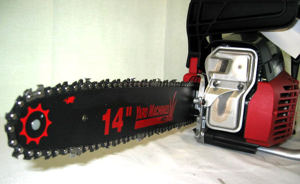

In [ ]:
# Generate a random index from the range of total image files (13394 in this case)
index = (np.random.choice(np.arange(13394), 1)).item()

# Create a PILImage object using a randomly selected image file from the 'image_files' list
img = PILImage.create(image_files[index])

# Print the dimensions of the selected image
print(img.size)

# Create and return a thumbnail of the image with a height of 300 pixels
img.to_thumb(h=300)


In [ ]:
def get_img_size(file):
    """
    Get the dimensions of an image file.

    Parameters:
    file (Path or str): The path to the image file.

    Returns:
    tuple: The dimensions of the image (width, height).
    """
    return PILImage.create(file).size


In [ ]:
# Retrieve dimensions of all image files in parallel for performance optimization, with a progress bar enabled
img_sizes = parallel(get_img_size, image_files, progress=True)


In [ ]:
pd.Series(img_sizes).value_counts()

(500, 375)      3134
(500, 333)      1174
(375, 500)      1041
(333, 500)       432
(500, 334)       276
                ... 
(799, 533)         1
(2000, 2503)       1
(792, 593)         1
(320, 405)         1
(803, 617)         1
Length: 2914, dtype: int64

### <Font color = 'indianred'>**Transforms**

In [ ]:
# DO NOT CHANGE THIS CELL FOR THE HW
# Define preprocessing transformations for training and testing datasets
data_transforms = {
    "train": transforms.Compose(
        [
            # Resize the shorter side of the image to 640 pixels
            transforms.Resize(200),
            # Perform a random crop to obtain a 427x427 image
            transforms.RandomCrop((150, 150)),
            # Convert image to PyTorch tensor
            transforms.ToTensor(),
            # Normalize tensor values to range [-1, 1]
            transforms.Normalize((0.5,), (0.5,)),
        ]
    ),
    "test": transforms.Compose(
        [
            # Resize the shorter side of the image to 640 pixels
            transforms.Resize(200),
            # Perform a center crop to obtain a 427x427 image
            transforms.CenterCrop((150, 150)),
            # Convert image to PyTorch tensor
            transforms.ToTensor(),
            # Normalize tensor values to range [-1, 1]
            transforms.Normalize((0.5,), (0.5,)),
        ]
    ),
}


In [ ]:
# Create a training dataset from the 'train' folder of the 'imagenette2' dataset, applying the defined 'train' transformations
trainset = torchvision.datasets.ImageFolder('datasets/imagenette2/train', transform=data_transforms['train'])

# Create a test and validation dataset from the 'val' folder of the 'imagenette2' dataset, applying the defined 'test' transformations
test_val_set = torchvision.datasets.ImageFolder('datasets/imagenette2/val', transform=data_transforms['test'])


In [ ]:
test_val_set.class_to_idx

{'n01440764': 0,
 'n02102040': 1,
 'n02979186': 2,
 'n03000684': 3,
 'n03028079': 4,
 'n03394916': 5,
 'n03417042': 6,
 'n03425413': 7,
 'n03445777': 8,
 'n03888257': 9}

In [ ]:
trainset.class_to_idx

{'n01440764': 0,
 'n02102040': 1,
 'n02979186': 2,
 'n03000684': 3,
 'n03028079': 4,
 'n03394916': 5,
 'n03417042': 6,
 'n03425413': 7,
 'n03445777': 8,
 'n03888257': 9}

In [ ]:
len(trainset), len(test_val_set)

(9469, 3925)

## <Font color = 'indianred'>**Create Test/Val Split**

In [ ]:
def split_dataset(base_dataset, fraction, seed):
    """
    Splits a given PyTorch Dataset into two parts, according to a specified fraction.

    Parameters:
    base_dataset (torch.utils.data.Dataset): The original dataset to be split.
    fraction (float): The fraction of the dataset to be used for the first split. Should be between 0 and 1.
    seed (int): The random seed for reproducibility.

    Returns:
    tuple: Two PyTorch Datasets obtained by randomly splitting the base dataset.
    """
    # Calculate the size of the first split
    split_a_size = int(fraction * len(base_dataset))
    # Calculate the size of the second split
    split_b_size = len(base_dataset) - split_a_size

    # Perform the split and return
    return torch.utils.data.random_split(
        base_dataset,
        [split_a_size, split_b_size],
        generator=torch.Generator().manual_seed(seed)
    )


In [ ]:
# Split the 'test_val_set' dataset into two equal parts, one for testing and another for validation, using a seed of 42 for reproducibility
testset, validset = split_dataset(test_val_set, 0.5, 42)

In [ ]:
testset[0][0].shape

torch.Size([3, 150, 150])

## <Font color = 'indianred'>**Create DataLoaders**

In [ ]:
# Initialize a DataLoader for the training set with batch size of 128 and shuffling enabled
train_loader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

# Initialize a DataLoader for the validation set with batch size of 256 and shuffling disabled
valid_loader = torch.utils.data.DataLoader(validset, batch_size=256, shuffle=False)

# Initialize a DataLoader for the test set with batch size of 256 and shuffling disabled
test_loader = torch.utils.data.DataLoader(testset, batch_size=256, shuffle=False)

In [ ]:
print(len(train_loader), len(valid_loader), len(test_loader))

74 8 8


## <Font color = 'indianred'>**Check Data Loaders**

In [ ]:
def check_loader(loader):
    """
    Prints the shape of image and label batches from the DataLoader.

    Parameters:
    loader (torch.utils.data.DataLoader): DataLoader instance containing the dataset.

    Side Effects:
    Prints the batch number, image shape, and label shape for the first three batches in the DataLoader.
    Prints the labels from the last processed batch.
    """
    num_epochs = 1  # Number of epochs to iterate through; set to 1 to check DataLoader

    # Loop through each epoch (only one epoch in this case)
    for epoch in range(num_epochs):
        # Enumerate through the DataLoader, getting the index and (image, label) tuple for each batch
        for idx, (image, label) in enumerate(loader):
            # Limit the check to the first 3 batches
            if idx >= 3:
                break
            # Print batch number, batch size, and shapes of the image and label tensors
            print(f" Batch Number: {idx+1} | Batch size: {image.shape[0]} | x shape: {image.shape} | y shape: {label.shape}")

    # Print labels from the last processed batch
    print(f"\nLabels from current batch \n {label}")


In [ ]:
check_loader(train_loader)

 Batch Number: 1 | Batch size: 128 | x shape: torch.Size([128, 3, 150, 150]) | y shape: torch.Size([128])
 Batch Number: 2 | Batch size: 128 | x shape: torch.Size([128, 3, 150, 150]) | y shape: torch.Size([128])
 Batch Number: 3 | Batch size: 128 | x shape: torch.Size([128, 3, 150, 150]) | y shape: torch.Size([128])

Labels from current batch 
 tensor([8, 7, 4, 2, 3, 8, 9, 7, 6, 9, 2, 8, 2, 1, 9, 6, 8, 7, 3, 8, 5, 6, 4, 1,
        4, 1, 0, 0, 0, 6, 9, 8, 6, 3, 1, 4, 3, 6, 9, 5, 6, 0, 4, 8, 2, 0, 9, 8,
        5, 0, 3, 1, 8, 7, 7, 8, 5, 1, 3, 5, 7, 2, 9, 5, 6, 1, 3, 4, 9, 5, 4, 4,
        2, 8, 7, 8, 8, 0, 5, 5, 2, 0, 6, 6, 6, 7, 5, 1, 5, 6, 2, 2, 8, 0, 7, 2,
        9, 1, 4, 0, 4, 0, 8, 5, 1, 5, 2, 5, 8, 7, 7, 8, 7, 5, 9, 0, 4, 7, 6, 0,
        0, 7, 5, 3, 7, 1, 6, 6])


In [ ]:
check_loader(valid_loader)

 Batch Number: 1 | Batch size: 256 | x shape: torch.Size([256, 3, 150, 150]) | y shape: torch.Size([256])
 Batch Number: 2 | Batch size: 256 | x shape: torch.Size([256, 3, 150, 150]) | y shape: torch.Size([256])
 Batch Number: 3 | Batch size: 256 | x shape: torch.Size([256, 3, 150, 150]) | y shape: torch.Size([256])

Labels from current batch 
 tensor([1, 0, 1, 2, 7, 2, 8, 5, 7, 5, 7, 5, 9, 3, 3, 9, 7, 1, 0, 1, 3, 6, 3, 5,
        2, 2, 7, 6, 6, 7, 5, 6, 7, 7, 5, 9, 0, 8, 0, 5, 5, 4, 2, 2, 6, 9, 1, 3,
        7, 7, 5, 1, 5, 2, 4, 9, 8, 6, 1, 3, 2, 8, 4, 7, 8, 9, 9, 1, 4, 2, 2, 1,
        4, 0, 5, 4, 5, 1, 5, 4, 1, 4, 4, 2, 3, 1, 8, 7, 6, 6, 8, 1, 6, 8, 3, 0,
        3, 1, 0, 9, 7, 1, 6, 8, 2, 8, 1, 2, 2, 7, 8, 0, 8, 7, 6, 4, 7, 7, 5, 0,
        3, 8, 2, 4, 5, 8, 9, 3, 4, 7, 5, 2, 3, 9, 0, 5, 1, 9, 1, 2, 5, 9, 5, 9,
        5, 2, 5, 0, 6, 7, 4, 1, 3, 7, 3, 9, 9, 0, 5, 2, 3, 2, 4, 6, 5, 4, 0, 9,
        5, 6, 5, 5, 4, 7, 7, 1, 0, 5, 9, 2, 8, 5, 8, 2, 7, 1, 7, 0, 6, 6, 7, 7,
        7, 5,

In [ ]:
check_loader(test_loader)

 Batch Number: 1 | Batch size: 256 | x shape: torch.Size([256, 3, 150, 150]) | y shape: torch.Size([256])
 Batch Number: 2 | Batch size: 256 | x shape: torch.Size([256, 3, 150, 150]) | y shape: torch.Size([256])
 Batch Number: 3 | Batch size: 256 | x shape: torch.Size([256, 3, 150, 150]) | y shape: torch.Size([256])

Labels from current batch 
 tensor([6, 0, 4, 3, 2, 6, 8, 0, 5, 5, 2, 2, 7, 2, 7, 1, 1, 1, 6, 3, 2, 1, 7, 2,
        9, 3, 2, 9, 2, 6, 6, 6, 5, 8, 7, 0, 1, 3, 6, 3, 8, 3, 9, 0, 7, 7, 1, 5,
        4, 3, 0, 8, 3, 8, 0, 3, 3, 1, 4, 9, 0, 5, 2, 2, 2, 5, 1, 5, 5, 1, 6, 0,
        3, 7, 4, 4, 9, 7, 3, 6, 3, 3, 6, 7, 6, 5, 6, 8, 4, 6, 5, 8, 5, 4, 0, 0,
        6, 3, 6, 9, 8, 2, 5, 0, 1, 3, 6, 7, 6, 4, 0, 9, 5, 8, 3, 9, 7, 8, 4, 5,
        5, 7, 8, 4, 4, 6, 9, 7, 8, 5, 1, 4, 8, 0, 4, 5, 0, 3, 3, 2, 6, 8, 8, 6,
        5, 7, 6, 6, 8, 3, 5, 7, 3, 1, 2, 3, 6, 2, 8, 5, 8, 5, 7, 9, 2, 3, 0, 0,
        1, 6, 8, 5, 5, 0, 8, 0, 9, 5, 8, 0, 1, 0, 8, 3, 8, 2, 6, 8, 0, 1, 1, 0,
        9, 9,

## <Font color = 'indianred'>**Check Transformations**

- Check if transformation are working correctly.
- The transformations are applied at the time of calling dataloader

In [ ]:
# check imputs and outputs
for input, target in train_loader:
  print(f'shape of inputs is :{input.shape}')
  print(f'\nmax input value  :{input.max()}')
  print(f'\nmin input value  :{input.min()}')
  print(f'\nmean input value  :{input.mean()}')
  print(f'\nstd input value  :{input.std()}')
  print(f'\nshape of targets is :{target.shape}')
  print(f'\ninputs  :{input[0, 0, 5:10, 5:10]}')

  break

shape of inputs is :torch.Size([128, 3, 150, 150])

max input value  :1.0

min input value  :-1.0

mean input value  :-0.11091858893632889

std input value  :0.5526241064071655

shape of targets is :torch.Size([128])

inputs  :tensor([[0.5608, 0.1922, 0.2314, 0.2392, 0.2549],
        [0.5137, 0.2157, 0.3098, 0.3176, 0.2627],
        [0.5059, 0.2863, 0.3647, 0.3961, 0.2627],
        [0.5137, 0.2863, 0.3333, 0.4275, 0.2078],
        [0.5529, 0.3098, 0.3725, 0.3647, 0.2314]])


## <Font color = 'indianred'>**Visualize the Data**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision

def show_images(images, rows=10, figsize=(10, 10), mean=0.5, std=0.5):
    """
    Creates and displays a grid of images using matplotlib.

    Parameters:
    - images (torch.Tensor): The images to display in grid format.
    - rows (int): Number of rows in the grid.
    - figsize (tuple): Dimensions of the figure for plotting.
    - mean (float): Mean used for unnormalizing the images.
    - std (float): Standard deviation used for unnormalizing the images.

    """
    # Unnormalize the images
    images = images * std + mean

    # Create the grid using torchvision's make_grid utility.
    img_grid = torchvision.utils.make_grid(images,
                                           nrow=rows,      # Number of rows for the grid layout
                                           padding=1,      # Padding between images
                                           pad_value=1)    # Value used for padding

    # Plotting the grid of images.
    plt.figure(figsize=figsize)
    plt.axis("off")  # Turn off axis
    plt.imshow(np.transpose(img_grid, (1, 2, 0)))  # Transpose tensor dimensions for display
    plt.show()  # Display the figure



torch.Size([50, 3, 150, 150])
torch.Size([50, 3, 150, 150])


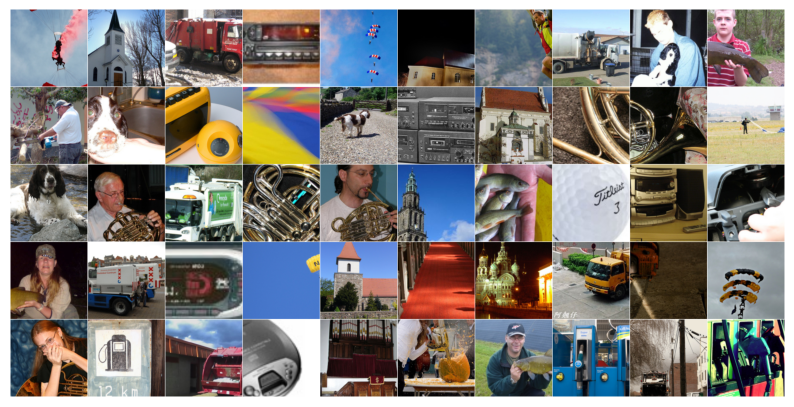

In [ ]:
# Generate random indices to select a subset of 50 images from the training set.
samples = torch.randperm(len(trainset))[:50]

# Use the generated indices to select images.
# Stack the selected images and permute dimensions for display.
# Note: `.permute(1,0,2,3)` rearranges the tensor dimensions for grid plotting.
images_list = [trainset[i][0] for i in samples]
images_selected = torch.stack(images_list)
print(images_selected.shape)


# Print the shape of the selected images tensor to validate its dimensions.
print(images_selected.shape)

# Display the selected images using the custom 'show_images' function.
show_images(images_selected)


# <Font color = 'indianred'>**Model**

In [ ]:
# Display the shape of the 'images' tensor
images_selected.shape

torch.Size([50, 3, 150, 150])

Display the shape of the 'images' tensor.
The dimensions are organized as follows:
> - batch_size: Number of images in the current batch
> - Channels: Number of color channels (e.g., 1 for grayscale, 3 for RGB)
> - Height: Height of each image in pixels
> - Width: Width of each image in pixels


Construct the following model:

<img src ="https://drive.google.com/uc?export=view&id=1NLMKCNcjGil4W1iI984fETOdK2g3B_Mk" width =300>



In [ ]:
class PytorchMLPSkip(nn.Module):

    def __init__(self, num_features, hidden_dim1, hidden_dim2, hidden_dim3, num_classes):
        super().__init__()

        self.flatten = nn.Flatten()

        # First hidden layer and its activation function
        self.hidden_layer1 = nn.Linear(num_features, hidden_dim1)
        self.layer1_activation = nn.ReLU()

        # Second hidden layer and its activation function
        self.hidden_layer2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.layer2_activation = nn.ReLU()

        # Output layer that combines output from both hidden layers
        self.hidden_layer3 = nn.Linear(hidden_dim1 + hidden_dim2, hidden_dim3)
        self.layer3_activation = nn.ReLU()

        self.output_layer = nn.Linear(hidden_dim3 + hidden_dim2, num_classes)


    def forward(self, x):

      # Flatten the input
        x = self.flatten(x)

        # First hidden layer and its activation
        out1 = self.layer1_activation(self.hidden_layer1(x))

        # Second hidden layer and its activation
        out2 = self.layer2_activation(self.hidden_layer2(out1))

        # Concatenate output from both hidden layers
        concat_output = torch.cat((out1, out2), dim=1)

        out3 = self.layer3_activation(self.hidden_layer3(concat_output))

        concat_output_2 = torch.cat((out3, out2), dim=1)

        # Final output layer
        return self.output_layer(concat_output_2)


In [ ]:
model= PytorchMLPSkip((150*150*3), 100, 50, 50, 10)

In [ ]:
model

PytorchMLPSkip(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (hidden_layer1): Linear(in_features=67500, out_features=100, bias=True)
  (layer1_activation): ReLU()
  (hidden_layer2): Linear(in_features=100, out_features=50, bias=True)
  (layer2_activation): ReLU()
  (hidden_layer3): Linear(in_features=150, out_features=50, bias=True)
  (layer3_activation): ReLU()
  (output_layer): Linear(in_features=100, out_features=10, bias=True)
)

In [ ]:
summary(model, (1, 3, 150, 150))

Layer (type:depth-idx)                   Output Shape              Param #
PytorchMLPSkip                           [1, 10]                   --
├─Flatten: 1-1                           [1, 67500]                --
├─Linear: 1-2                            [1, 100]                  6,750,100
├─ReLU: 1-3                              [1, 100]                  --
├─Linear: 1-4                            [1, 50]                   5,050
├─ReLU: 1-5                              [1, 50]                   --
├─Linear: 1-6                            [1, 50]                   7,550
├─ReLU: 1-7                              [1, 50]                   --
├─Linear: 1-8                            [1, 10]                   1,010
Total params: 6,763,710
Trainable params: 6,763,710
Non-trainable params: 0
Total mult-adds (M): 6.76
Input size (MB): 0.27
Forward/backward pass size (MB): 0.00
Params size (MB): 27.05
Estimated Total Size (MB): 27.33

# <Font color = 'indianred'>**Functions for Model Training**

YOU DO NOT NEED TO CHGANGE THESE FUNCTIONS. READ THEE CODE TO UNDERSTAND FUNCTIONS.




To train a machine learning model effectively, we need a structured approach that combines training and evaluation while maintaining flexibility and readability. We break down the training loop into four distinct functions, each serving a specific role. This modular approach enhances code clarity, reusability, and allows for easy modifications. Let's outline our strategy for training and evaluation:

1. **`step` Function**: This is our foundational building block. It handles a single forward and backward step for a batch of data. Whether during training or evaluation, we need to calculate model outputs, compute the loss, and potentially perform backpropagation to update model parameters. By encapsulating these fundamental operations in `step`, we ensure consistency and enable future adjustments with minimal disruption.

  **Model Training** involves five steps:

- Step 1: Compute model's predictions - forward pass (both train and eval)
- Step 2: Compute loss (both train and eval)
- Step 3: Compute the gradients (only train)
- Step 4: Update the parameters (only train)
- Step 5: Repeat steps 1 - 4


2. **`train_epoch` Function**: This function orchestrates training for a single epoch. It iterates through the entire training dataset, invoking `step` for each batch. While doing so, it keeps track of the running training loss and the number of correct predictions. Its primary role is to aggregate statistics for the entire epoch. Additionally, it ensures that the model is in the training mode.

3. **`val_epoch` Function**: Similar to `train_epoch`, this function handles validation. It iterates through the validation dataset, employing `step` for each batch, but crucially, it operates in a context where gradients aren't computed. This no-gradient mode conserves memory and computational resources. Like `train_epoch`, it is responsible for aggregating validation metrics and also ensures that the model is in evaluation mode.

4. **`train` Function**: Our top-level function for training the model. It sets up the training environment for multiple epochs, invoking `train_epoch` for each training epoch and `val_epoch` for each validation epoch. It keeps track of metrics across epochs, making it easier to analyze model performance over time.

By organizing our training and evaluation pipeline in this manner, we achieve code modularity and clarity. Furthermore, this structure allows us to easily swap out components like loss functions, optimizers, or metrics without overhauling the entire codebase. Now, let's dive into the details of each function.

## <Font color = 'indianred'>**Step Function**

In [ ]:
def step(inputs, targets, model, device, loss_function=None, optimizer=None):
    """
    Performs a forward and backward pass for a given batch of inputs and targets.

    Parameters:
    - inputs (torch.Tensor): The input data for the model.
    - targets (torch.Tensor): The true labels for the input data.
    - model (torch.nn.Module): The neural network model.
    - device (torch.device): The computing device (CPU or GPU).
    - loss_function (torch.nn.Module, optional): The loss function to use.
    - optimizer (torch.optim.Optimizer, optional): The optimizer to update model parameters.

    Returns:
    - loss (float): The computed loss value (only if loss_function is not None).
    - outputs (torch.Tensor): The predictions from the model.
    - correct (int): The number of correctly classified samples in the batch.
    """
    # Move the model and data to the device
    model = model.to(device)
    inputs = inputs.to(device)
    targets = targets.to(device)

    # Step 1: Forward pass to get the model's predictions
    outputs = model(inputs)

    # Step 2: Compute the loss using the provided loss function
    if loss_function:
        loss = loss_function(outputs, targets)

    # Step 2: Calculate the number of correctly classified samples
    predicted = torch.argmax(outputs.data, 1)
    correct = (predicted == targets).sum().item()

    # Step 3 and 4: Perform backward pass and update model parameters if an optimizer is provided
    if optimizer:
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Return relevant metrics
    if loss_function:
        return loss, outputs, correct
    else:
        return outputs, correct


## <Font color = 'indianred'>**Train_Epoch Function**

In [ ]:
def train_epoch(train_loader, model, device, loss_function, optimizer):
    """
    Trains the model for one epoch using the provided data loader and updates the model parameters.

    Parameters:
    - train_loader (torch.utils.data.DataLoader): DataLoader object for the training set.
    - model (torch.nn.Module): The neural network model to be trained.
    - device (torch.device): The computing device (CPU or GPU).
    - loss_function (torch.nn.Module): The loss function to use for training.
    - optimizer (torch.optim.Optimizer): The optimizer to update model parameters.

    Returns:
    - train_loss (float): Average training loss for the epoch.
    - train_acc (float): Training accuracy for the epoch.
    """
    # Set the model to training mode
    model.train()

    # Initialize variables to track running training loss and correct predictions
    running_train_loss = 0.0
    running_train_correct = 0

    # Iterate over all batches in the training data
    for inputs, targets in train_loader:
        # Perform a forward and backward pass, updating model parameters
        loss, _, correct = step(inputs, targets, model, device, loss_function, optimizer)

        # Update running loss and correct predictions counter
        running_train_loss += loss.item()
        running_train_correct += correct

    # Compute average loss and accuracy for the entire training set
    train_loss = running_train_loss / len(train_loader)
    train_acc = running_train_correct / len(train_loader.dataset)

    return train_loss, train_acc


## <Font color = 'indianred'>**Val_Epoch Function**

In [ ]:
def val_epoch(valid_loader, model, device, loss_function):
    """
    Validates the model for one epoch using the provided data loader.

    Parameters:
    - valid_loader (torch.utils.data.DataLoader): DataLoader object for the validation set.
    - model (torch.nn.Module): The neural network model to be validated.
    - device (torch.device): The computing device (CPU or GPU).
    - loss_function (torch.nn.Module): The loss function to evaluate the model.

    Returns:
    - val_loss (float): Average validation loss for the epoch.
    - val_acc (float): Validation accuracy for the epoch.
    """
    # Set the model to evaluation mode
    model.eval()

    # Initialize variables to track running validation loss and correct predictions
    running_val_loss = 0.0
    running_val_correct = 0

    # Disable gradient computation
    with torch.no_grad():
        # Iterate over all batches in the validation data
        for inputs, targets in valid_loader:
            # Perform a forward pass to get loss and number of correct predictions
            loss, _, correct = step(inputs, targets, model, device, loss_function, optimizer=None)

            # Update running loss and correct predictions counter
            running_val_loss += loss.item()
            running_val_correct += correct

    # Compute average loss and accuracy for the entire validation set
    val_loss = running_val_loss / len(valid_loader)
    val_acc = running_val_correct / len(valid_loader.dataset)

    return val_loss, val_acc


## <Font color = 'indianred'>**Train Function**

In [ ]:
def train(train_loader, valid_loader, model, optimizer, loss_function, epochs, device):
    """
    Trains and validates the model, and returns history of train and validation metrics.

    Parameters:
    - train_loader (torch.utils.data.DataLoader): DataLoader for the training set.
    - valid_loader (torch.utils.data.DataLoader): DataLoader for the validation set.
    - model (torch.nn.Module): Neural network model to train.
    - optimizer (torch.optim.Optimizer): Optimizer algorithm.
    - loss_function (torch.nn.Module): Loss function to evaluate the model.
    - epochs (int): Number of epochs to train the model.
    - device (torch.device): The computing device (CPU or GPU).

    Returns:
    - train_loss_history (list): History of training loss for each epoch.
    - train_acc_history (list): History of training accuracy for each epoch.
    - valid_loss_history (list): History of validation loss for each epoch.
    - valid_acc_history (list): History of validation accuracy for each epoch.
    """

    # Initialize lists to store metrics for each epoch
    train_loss_history = []
    valid_loss_history = []
    train_acc_history = []
    valid_acc_history = []

    # Loop over the number of specified epochs
    for epoch in range(epochs):
        # Train model on training data and capture metrics
        train_loss, train_acc = train_epoch(
            train_loader, model, device, loss_function, optimizer)

        # Validate model on validation data and capture metrics
        valid_loss, valid_acc = val_epoch(
            valid_loader, model, device, loss_function)

        # Store metrics for this epoch
        train_loss_history.append(train_loss)
        train_acc_history.append(train_acc)
        valid_loss_history.append(valid_loss)
        valid_acc_history.append(valid_acc)

        # Output epoch-level summary
        print(f"Epoch {epoch+1}/{epochs}")
        print(f"Train Loss: {train_loss:.4f} | Train Accuracy: {train_acc*100:.2f}%")
        print(f"Valid Loss: {valid_loss:.4f} | Valid Accuracy: {valid_acc*100:.2f}%")
        print()

    return train_loss_history, train_acc_history, valid_loss_history, valid_acc_history


## <Font color = 'indianred'>**Hyperparameters**

In [ ]:
# Define the model architecture and training parameters
num_features = 3*150*150
hidden_dim1 = 100
hidden_dim2 = 50
hidden_dim3 = 50
num_classes = 10
epochs = 5
learning_rate = 0.01

# Set a random seed for reproducibility
torch.manual_seed(42)

# Create the neural network model
model = PytorchMLPSkip(num_features, hidden_dim1, hidden_dim2, hidden_dim3, num_classes)
model

PytorchMLPSkip(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (hidden_layer1): Linear(in_features=67500, out_features=100, bias=True)
  (layer1_activation): ReLU()
  (hidden_layer2): Linear(in_features=100, out_features=50, bias=True)
  (layer2_activation): ReLU()
  (hidden_layer3): Linear(in_features=150, out_features=50, bias=True)
  (layer3_activation): ReLU()
  (output_layer): Linear(in_features=100, out_features=10, bias=True)
)

In [ ]:
# Define the optimizer for updating model parameters
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Define the loss function for training
loss_function = nn.CrossEntropyLoss()

# Determine the computing device (CPU or GPU) to use
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')



## <Font color = 'indianred'>**Sanity Check**
- Check the loss without any training. For Cross entropy the expected value will be log(number of classes)

In [ ]:
# Sanity check to verify initial loss
i = 0
expected_loss = np.log(10)  # Theoretical loss for a random model
for input_, targets in train_loader:
    # Move inputs and targets to the specified device
    input_ = input_.to(device)
    targets = targets.to(device)
    model.to(device)
    model.eval()

    # Forward pass
    output = model(input_)

    # Calculate the loss
    loss = loss_function(output, targets)
    print(f'Actual loss: {loss}')

    i += 1
    if i > 2:
        break

print(f'Expected Theoretical loss: {expected_loss}')


Actual loss: 2.3062775135040283
Actual loss: 2.3018076419830322
Actual loss: 2.2999565601348877
Expected Theoretical loss: 2.302585092994046


## <Font color = 'indianred'>**Call Train Function**

In [ ]:
# Call the train function to train the model
train_losses, train_acc, valid_losses, valid_acc = train(
    train_loader, valid_loader, model, optimizer, loss_function, epochs, device
)


Epoch 1/5
Train Loss: 2.1714 | Train Accuracy: 23.94%
Valid Loss: 2.0637 | Valid Accuracy: 27.92%

Epoch 2/5
Train Loss: 2.0239 | Train Accuracy: 29.61%
Valid Loss: 1.9715 | Valid Accuracy: 30.82%

Epoch 3/5
Train Loss: 1.9519 | Train Accuracy: 31.78%
Valid Loss: 1.9102 | Valid Accuracy: 33.11%

Epoch 4/5
Train Loss: 1.9132 | Train Accuracy: 33.55%
Valid Loss: 1.8742 | Valid Accuracy: 35.20%

Epoch 5/5
Train Loss: 1.8858 | Train Accuracy: 34.29%
Valid Loss: 1.8483 | Valid Accuracy: 35.71%



## <Font color = 'indianred'>**Plot Losses Metrics**


In [ ]:
def plot_history(train_losses, train_metrics, val_losses=None, val_metrics=None):
    """
    Plot training and validation loss and metrics over epochs.

    Args:
        train_losses (list): List of training losses for each epoch.
        train_metrics (list): List of training metrics (e.g., accuracy) for each epoch.
        val_losses (list, optional): List of validation losses for each epoch.
        val_metrics (list, optional): List of validation metrics for each epoch.

    Returns:
        None
    """
    epochs = range(1, len(train_losses) + 1)

    # Plot training and validation losses
    plt.figure()
    plt.plot(epochs, train_losses, label="Train")
    if val_losses:
        plt.plot(epochs, val_losses, label="Validation")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    # Plot training and validation metrics (if available)
    if train_metrics[0] is not None:
        plt.figure()
        plt.plot(epochs, train_metrics, label="Train")
        if val_metrics:
            plt.plot(epochs, val_metrics, label="Validation")
        plt.xlabel("Epochs")
        plt.ylabel("Metric")
        plt.legend()
        plt.show()


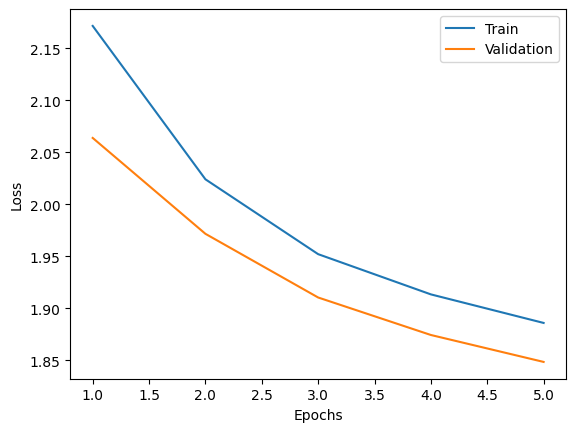

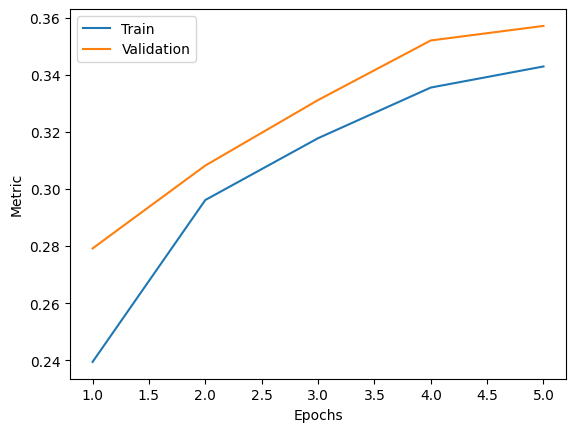

In [ ]:
plot_history(train_losses, train_acc, valid_losses, valid_acc)

# <Font color = 'indianred'>**Model Checkpointing**

In [ ]:
# Get the current timestamp in the format "YYYY-MM-DD_HH-MM-SS"
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Define a suffix for the file name
suffix = 'twolayer_skip'

# Combine the timestamp and suffix to create the file path
path = model_folder / f'{timestamp}_{suffix}.pt'

path


Path('/content/drive/MyDrive/Colab_Notebooks/BUAN_6382_Applied_DeepLearning/Data/Hw3/2023-09-22_15-32-28_twolayer_skip.pt')

In [ ]:
# Save the model's state dictionary to the specified file path
torch.save(model.state_dict(), path)

In [ ]:
# Create an instance of the model with the same architecture
my_model = PytorchMLPSkip(num_features, hidden_dim1, hidden_dim2, hidden_dim3, num_classes)

# Load the model's state dictionary from the specified checkpoint file
checkpoint = torch.load(path)

# Load the saved state dictionary into the model
my_model.load_state_dict(checkpoint)


<All keys matched successfully>

# <Font color = 'indianred'>**Get Accuracy, Predictions**

In [ ]:
def get_acc_pred(data_loader, model, device):
    """
    Function to get predictions and accuracy for a given data using a trained model
    Input: data iterator, model, device
    Output: predictions and accuracy for the given dataset
    """
    model = model.to(device)
    # Set model to evaluation mode
    model.eval()

    # Create empty tensors to store predictions and actual labels
    predictions = torch.Tensor().to(device)
    y = torch.Tensor().to(device)

    # Iterate over batches from data iterator
    with torch.no_grad():
        for inputs, targets in data_loader:
            # Process the batch to get the loss, outputs, and correct predictions
            outputs, _ = step(inputs, targets, model,
                              device, loss_function=None, optimizer=None)

            # Choose the label with maximum probability
            _, predicted = torch.max(outputs.data, 1)

            # Add the predicted labels and actual labels to their respective tensors
            predictions = torch.cat((predictions, predicted))
            y = torch.cat((y, targets.to(device)))

    # Calculate accuracy by comparing the predicted and actual labels
    accuracy = (predictions == y).float().mean()

    # Return tuple containing predictions and accuracy
    return y, predictions, accuracy

In [ ]:

# Get the prediction and accuracy
y_test, predictions_test, acc_test = get_acc_pred(test_loader, my_model, device)

In [ ]:
# Print Test Accuracy
print('Test accuracy', acc_test * 100)


Test accuracy tensor(37.5127, device='cuda:0')


# <Font color = 'indianred'>**Confusion Matrix for Test Data**

Now, we will make some visualizations for the predictions that we obtained.

We will construct a `confusion matrix` which will help us to visualize the performance of our classification model on the test dataset as we know the true values for the test data.

In [ ]:
# Define the human-readable class labels corresponding to the numerical class indices
classes = ['tench',
    'English springer',
    'cassette player',
    'chain saw',
    'church',
    'French horn',
    'garbage truck',
    'gas pump',
    'golf ball',
    'parachute']

# Get an array containing actual labels from the testing dataset
testing_labels = np.array(y_test.cpu())

# Compute the confusion matrix between actual labels and predicted labels
cm = confusion_matrix(testing_labels, predictions_test.cpu())

# Create a ConfusionMatrixDisplay object for visualization with class labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)


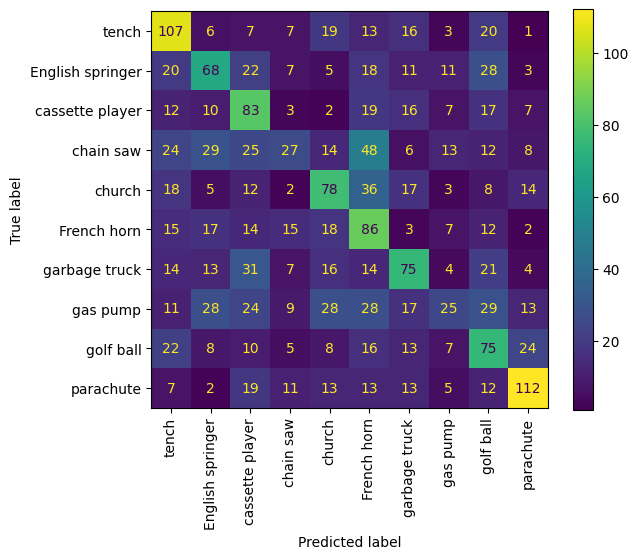

In [ ]:
# Create the confusion matrix plot
ax = disp.plot().ax_

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Access the Matplotlib figure from the Axes object and set its size

# Get the current figure
fig = plt.gcf()

# Remove the last (existing) color bar
plt.delaxes(fig.axes[-1])
ax.figure.set_size_inches(8, 8)

# Modify the colorbar size
ax.figure.colorbar(ax.images[0], ax=ax, shrink=0.65)  # 'shrink' parameter adjusts the size

plt.show()